### Importing required libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

In [29]:
data = pd.read_csv("data-train.csv")

In [30]:
# calling the data to do all the basic checks
data.head(8)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0


In this dataset all the variables except "price_range" is independent variables, and the column "price_range" is target variable.

### Domain Analysis

#### Independent variables
●	battery_power - Total energy a battery can store in one time measured in mAh<br>
●	blue - Has bluetooth or not<br>
●	clock_speed - speed at which microprocessor executes instructions<br>
●	dual_sim - Has dual sim support or not<br>
●	fc - Front Camera mega pixels<br>
●	four_g - Has 4G or not<br>
●	int_memory - Internal Memory in Gigabytes<br>
●	m_dep - Mobile Depth in cm<br>
●	mobile_wt - Weight of mobile phone<br>
●	n_cores - Number of cores of processor<br>
●	pc - Primary Camera mega pixels<br>
●	px_height - Pixel Resolution Height<br>
●	px_width - Pixel Resolution Width<br>
●	ram - Random Access Memory in Megabytes<br>
●	sc_h - Screen Height of mobile in cm<br>
●	sc_w - Screen Width of mobile in cm<br>
●	talk_time - longest time that a single battery charge will last when you are<br>
●	three_g - Has 3G or not<br>
●	touch_screen - Has touch screen or not<br>
●	wifi - Has wifi or not<br>

##### Dependent variable
●	price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [31]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [33]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values in any of the rows hence we do not need to do data preprocessing as the data is already clean

### Exploratory Data Analysis

<AxesSubplot:xlabel='blue', ylabel='Count'>

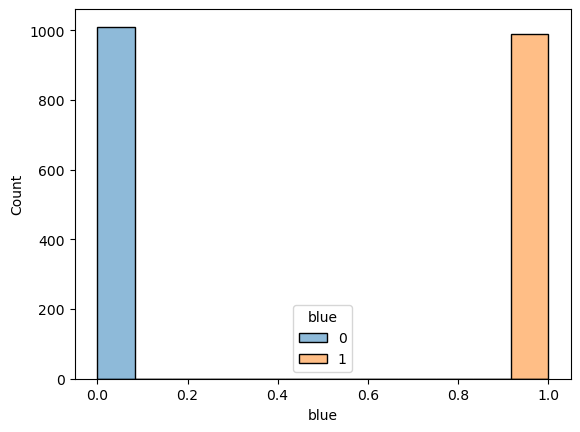

In [34]:
# Univariate analysis
sns.histplot(x=data.blue,hue=data.blue)

<AxesSubplot:xlabel='n_cores', ylabel='Count'>

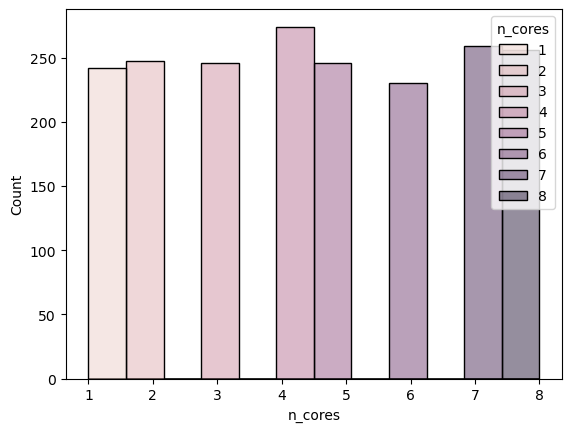

In [35]:
sns.histplot(x=data.n_cores,hue=data.n_cores)

<AxesSubplot:xlabel='three_g', ylabel='Count'>

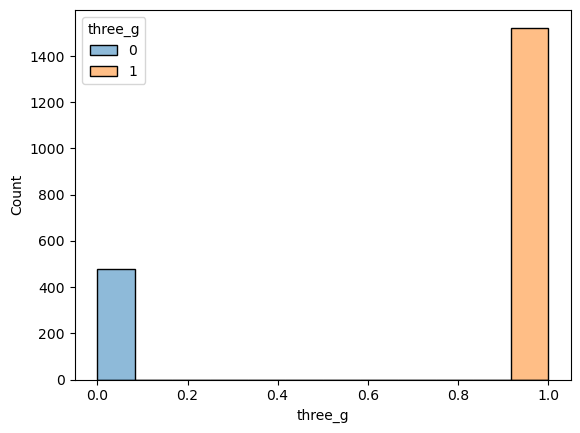

In [36]:
sns.histplot(x=data.three_g,hue=data.three_g)

Most of the cell phoenes are 3G enabled

<AxesSubplot:xlabel='wifi', ylabel='Count'>

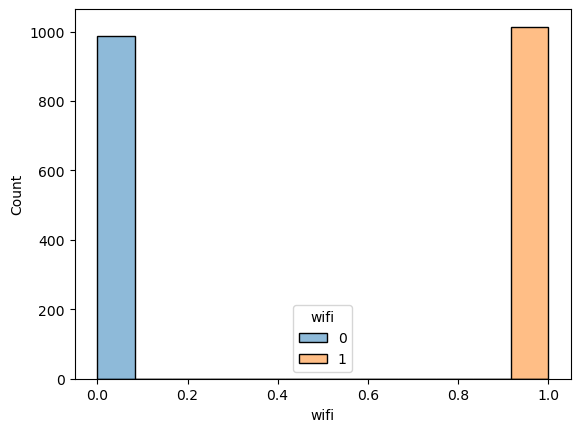

In [37]:
sns.histplot(x=data.wifi,hue=data.wifi)

In [38]:
# Renaming Target variable to make it integer to categorical
# data['price_range'].replace([0,1,2,3],["low cost", "medium cost", "high cost","very high cost"],inplace = True)

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

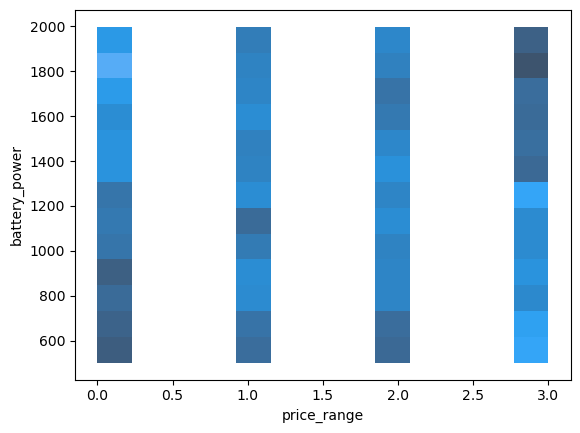

In [39]:
# Bivariate analysis
sns.histplot(y=data.battery_power,x=data.price_range)

<AxesSubplot:xlabel='price_range', ylabel='ram'>

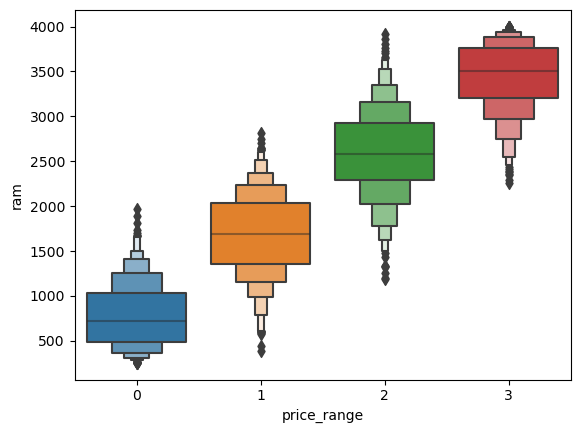

In [40]:
sns.boxenplot(y=data.ram,x=data.price_range)

### Scaling the indipendent variables

In [41]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[["battery_power","blue","clock_speed","dual_sim","fc","four_g","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w","talk_time","three_g","touch_screen","wifi"]]=scale.fit_transform(data[["battery_power","blue","clock_speed","dual_sim","fc","four_g","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w","talk_time","three_g","touch_screen","wifi"]])

In [42]:
data.head(8)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1
5,0.907148,0.0,0.00,1.0,0.157895,0.0,0.322581,0.666667,0.700000,0.000000,...,0.512245,0.770360,0.216729,0.857143,0.055556,0.444444,1.0,0.0,0.0,1
6,0.881764,0.0,0.48,0.0,0.210526,1.0,0.129032,0.777778,0.491667,1.000000,...,0.194388,0.345794,0.792090,0.571429,0.444444,0.888889,1.0,0.0,1.0,3
7,0.970608,0.0,0.00,1.0,0.000000,0.0,0.354839,0.777778,0.891667,0.428571,...,0.261224,0.433244,0.118653,0.785714,0.166667,0.166667,1.0,1.0,1.0,0


### Model creation

#### Using Support Vector Machines

In [43]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [44]:
# Defining x and y
X=data.loc[:,['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]
y=data.price_range

In [45]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


In [46]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [58]:
# Creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=5)

In [68]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
51,0.841015,0.0,0.36,1.0,0.263158,0.0,0.983871,0.777778,0.391667,1.000000,0.95,0.705102,0.589453,0.480224,1.000000,0.666667,0.777778,0.0,1.0,0.0
1327,0.298597,0.0,0.72,0.0,0.736842,0.0,0.322581,0.000000,0.775000,0.571429,1.00,0.131122,0.770360,0.866649,0.428571,0.388889,0.944444,1.0,1.0,1.0
1488,0.305945,1.0,0.32,1.0,0.000000,0.0,0.548387,0.333333,0.966667,0.571429,0.70,0.669898,0.554740,0.752806,1.000000,0.055556,0.333333,1.0,1.0,1.0
1432,0.086172,0.0,0.60,0.0,0.473684,1.0,0.193548,0.444444,0.833333,1.000000,0.65,0.033673,0.632844,0.255478,0.500000,0.444444,0.555556,1.0,0.0,0.0
417,0.100200,1.0,0.12,1.0,0.105263,1.0,0.983871,0.111111,0.800000,0.571429,0.20,0.279592,0.238985,0.531267,0.642857,0.500000,0.944444,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,0.545090,0.0,0.52,1.0,0.105263,0.0,0.661290,0.444444,0.275000,0.571429,0.15,0.091327,0.075434,0.849813,0.785714,0.722222,0.166667,0.0,1.0,1.0
275,0.480294,0.0,0.96,0.0,0.157895,0.0,0.967742,0.444444,0.375000,0.428571,0.40,0.205612,0.956609,0.623463,1.000000,0.611111,0.722222,1.0,1.0,1.0
1114,0.187041,1.0,0.32,1.0,0.052632,0.0,1.000000,0.111111,0.066667,0.142857,0.35,0.187755,0.071429,0.963656,0.857143,0.555556,0.388889,0.0,0.0,0.0
1751,0.004676,1.0,0.32,0.0,0.052632,0.0,0.774194,0.666667,0.016667,0.571429,0.45,0.052041,0.463952,0.512827,0.642857,0.222222,0.666667,0.0,0.0,1.0


In [59]:
data.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [49]:
from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(X_train, y_train)

SVC()

In [51]:
# Predicting the output for X_test
y_hat=svclassifier.predict(X_test)

In [52]:
y_hat

array([2, 2, 2, 0, 1, 1, 2, 3, 2, 1, 2, 0, 3, 3, 2, 0, 1, 2, 0, 3, 0, 1,
       3, 1, 2, 2, 1, 3, 0, 2, 1, 2, 0, 0, 3, 2, 0, 3, 2, 0, 3, 1, 3, 2,
       3, 3, 0, 0, 2, 2, 3, 3, 2, 1, 2, 1, 1, 0, 2, 1, 0, 0, 2, 3, 1, 1,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 1, 3, 1, 3, 1, 1, 2, 2, 0, 1,
       3, 1, 3, 0, 3, 3, 2, 2, 1, 2, 3, 3, 3, 1, 1, 0, 3, 2, 1, 2, 0, 3,
       0, 2, 0, 0, 2, 1, 1, 3, 2, 0, 1, 2, 1, 0, 3, 3, 0, 0, 1, 3, 2, 3,
       2, 0, 1, 0, 2, 0, 0, 2, 1, 3, 0, 1, 3, 2, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 3,
       0, 2, 3, 0, 0, 0, 2, 2, 3, 2, 3, 1, 3, 2, 3, 1, 1, 2, 3, 1, 2, 1,
       0, 2, 3, 1, 3, 0, 2, 3, 3, 2, 1, 0, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 0, 3, 2, 0, 2, 1, 2, 1, 3, 3, 1, 2, 3, 2, 1, 2, 1, 1, 3, 0, 1,
       1, 1, 1, 0, 2, 2, 0, 0, 3, 3, 0, 2, 2, 1, 0, 3, 3, 2, 3, 1, 2, 1,
       0, 2, 3, 3, 2, 2, 0, 1, 1, 2, 2, 1, 3, 0, 3, 3, 2, 0, 1, 1, 1, 3,
       2, 3, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 3, 3,

In [56]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc*100

86.2

In [57]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       129
           1       0.78      0.85      0.81       118
           2       0.80      0.85      0.82       129
           3       0.95      0.87      0.91       124

    accuracy                           0.86       500
   macro avg       0.87      0.86      0.86       500
weighted avg       0.87      0.86      0.86       500



#### Using Decisoin Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(X_train,y_train)#training the model
y_hat=dt.predict(X_test)#prediction
y_hat#predicted values 

array([2, 3, 3, 0, 1, 1, 2, 3, 2, 0, 2, 0, 3, 3, 2, 0, 1, 2, 1, 3, 0, 1,
       3, 1, 3, 2, 2, 3, 0, 1, 0, 2, 0, 0, 3, 2, 0, 3, 3, 0, 3, 1, 3, 2,
       3, 3, 0, 0, 2, 2, 3, 3, 2, 2, 1, 0, 1, 0, 2, 1, 0, 0, 2, 3, 1, 1,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 0, 3, 1, 3, 1, 1, 1, 1, 0, 1,
       2, 1, 3, 0, 3, 3, 2, 2, 1, 2, 3, 3, 3, 1, 1, 0, 3, 2, 0, 2, 0, 3,
       0, 2, 0, 0, 1, 1, 2, 3, 3, 0, 1, 2, 1, 0, 3, 2, 0, 0, 1, 3, 2, 2,
       2, 0, 1, 0, 2, 0, 0, 2, 1, 3, 0, 1, 3, 1, 0, 1, 0, 1, 1, 1, 2, 0,
       1, 2, 2, 1, 0, 3, 3, 3, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 3,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 2, 3, 1, 3, 2, 3, 1, 1, 1, 3, 1, 2, 2,
       0, 1, 2, 0, 3, 0, 2, 3, 3, 2, 1, 0, 1, 3, 1, 3, 1, 1, 2, 1, 1, 3,
       3, 0, 3, 2, 0, 1, 1, 1, 1, 3, 3, 2, 1, 3, 2, 1, 3, 1, 0, 3, 0, 1,
       2, 1, 0, 0, 2, 2, 0, 0, 3, 3, 0, 2, 2, 0, 0, 3, 3, 2, 3, 0, 1, 1,
       0, 2, 3, 3, 2, 3, 0, 1, 1, 2, 2, 1, 3, 0, 3, 3, 2, 0, 1, 0, 1, 3,
       3, 3, 0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 3, 3, 3,

In [61]:
y_train_predict=dt.predict(X_train)#predicting training data to check training performance 
y_train_predict

array([3, 0, 3, ..., 1, 2, 3], dtype=int64)

In [62]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
##Training score
y_train_predict=dt.predict(X_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train

1.0

In [63]:
print(classification_report(y_train,y_train_predict))# it will give precision,recall,f1 scores and accuracy  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       399
           3       1.00      1.00      1.00       396

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [69]:
## test acc
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc*100

85.75

### Conclusion

In this Machine learning model I have used Support vector machine and Decision tree algorithm the test accuracy of SVM was 86.2%<br>
Whereas using Decision tree the test accuracy was 85.75% Hence there is slight difference in both and we can conclude that SVM performs slightly better for this model